# 01 Differential Geometry for Engineers

## A) Manifolds

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE
- Texts and illustrations by [Adele Myers](https://ahma2017.wixsite.com/adelemyers) @ BioShape Lab.
- Textbook: Ch. 1 - 4.

<center><img src="figs/01_manifold_definition2.png" width=400px alt="default"/></center>


# Outline of ECE 594n

- **Unit 1 (Geometry): Differential Geometry for Engineers**
- Unit 2 (Shapes): Computational Representations of Biomedical Shapes
- Unit 3 (Machine Learning): Geometric Machine Learning for Shapes

<center><img src="figs/hero_brain_mris_3360x960_417KB.jpg" width=1400px alt="default"/></center>

Examples taken from cutting-edge research in the **biomedical field**.

# Outline of Unit 1

- **Unit 1 (Geometry)**: Differential Geometry for Engineers
  - **A) Manifolds**
    - Our data spaces.
    - Example: a space of shapes.
  - B) Lie groups
    - Group of transformations that deform our data.
    - Example: the group of rotations.
  - C) Riemannian Metrics
    - Tools we use to compute on these spaces.
    - Example: helps computing a distance between two shapes.

# Motivation: Shape of Glaucoma

Glaucoma is a group of eye conditions that:
- damage the optic nerve, the health of which is vital for good vision. 
- are often caused by an abnormally high pressure in your eye.
- are one of the leading causes of blindness.
- age 40: 1 in 200; age 80: 1 in 8.

<center><img src="figs/01_optic_nerves.png" width=500px alt="default"/></center>
<center>Comparison of optic nerve heads in monkeys with and without glaucoma.</center>



$\color{#EF5645}{\text{Question}}$: Find shape markers of glaucoma for automatic diagnosis?

Data from Heidelberg Retina Tomograph - Patrangenaru \& Ellingson (2015):
- 11 monkeys
- 22 images of monkeys’ eyes:
  - an experimental glaucoma was introduced in one eye, 
  - while the second eye was kept as control. 
  
<center><img src="figs/01_optic_nerves.png" width=500px alt="default"/></center>
<center>Comparison of optic nerve heads in monkeys with and without glaucoma.</center>


On each image, 5 anatomical landmarks were recorded:
  - 1: superior aspect of the retina,
  - 2: side of the retina closest to the temporal bone of the skull,
  - 3: nose side of the retina,
  - 4: inferior point,
  - 5: optical nerve head deepest point.
 
Each image has a label:
  - Label 0 refers to a normal eye,
  - Label 1 to an eye with glaucoma.

$\color{#EF5645}{\text{Question}}$: Find significant difference in shape formed by the landmarks?

# Exploratory Analysis

In [1]:
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import warnings
warnings.filterwarnings("ignore")

In [8]:
import geomstats.datasets.utils as data_utils

nerves, labels, monkeys = data_utils.load_optical_nerves()
print(nerves.shape)
print(labels)
print(monkeys)

(22, 5, 3)
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10]


In [11]:
print(monkeys == 1)

two_nerves = nerves[monkeys == 1]
print(two_nerves.shape)

two_labels = labels[monkeys == 1]
print(two_labels)

label_to_str = {0: "Normal nerve", 1: "Glaucoma nerve"}
label_to_color = {
    0: (102 / 255, 178 / 255, 255 / 255, 1.0),
    1: (255 / 255, 178 / 255, 102 / 255, 1.0),
}

[False False  True  True False False False False False False False False
 False False False False False False False False False False]
(2, 5, 3)
[0 1]


Next we extract 3 landmarks out of the 5 (for simplicity), 
and look at triangular shapes of glaucoma.

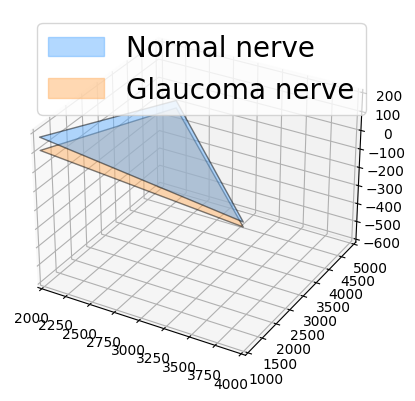

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d"); ax.set_xlim((2000, 4000)); ax.set_ylim((1000, 5000)); ax.set_zlim((-600, 200))

for nerve, label in zip(two_nerves, two_labels):
    x = nerve[1:4, 0]; y = nerve[1:4, 1]; z = nerve[1:4, 2]; verts = [list(zip(x, y, z))]
    poly = Poly3DCollection(verts, alpha=0.5); color = label_to_color[int(label)]; poly.set_color(colors.rgb2hex(color)); poly.set_edgecolor("k")
    ax.add_collection3d(poly)

patch_0 = mpatches.Patch(color=label_to_color[0], label=label_to_str[0], alpha=0.5); patch_1 = mpatches.Patch(color=label_to_color[1], label=label_to_str[1], alpha=0.5)
plt.legend(handles=[patch_0, patch_1], prop={"size": 20}); 
plt.show()

We could analyze the $\color{#EF5645}{\text{object}}$:
- 2D triangle = 3 points in 2D $(x_1, y_1), (x_2, y_2), (x_3, y_3)$
  - 6 degrees of freedom (Dof)
- 3D triangle = 3 points in 3D $(x_1, y_1, z_1)$, $(x_2, y_2, z_2)$, $(x_3, y_3, z_3)$
  - 9 degrees of freedom (Dof)

But we are really interested in its $\color{#EF5645}{\text{shape}}$: characteristics of the object that remain unchanged once we have filtered out transformations that do not change the shape
- For 2D and 3D triangular shapes: only need 2 Dofs! (see Unit 2)
- ... at the cost of having data that belong to a **manifold**

### Manifold of 2D Triangular Shapes : Sphere

<center><img src="figs/01_triangles_2d.png" width=800px alt="default"/></center>

### Manifold of 3D Triangular Shapes : Half-Sphere

<center><img src="figs/01_triangle_3d.png" width=900px alt="default"/></center>

# Need for Foundations in Geometry

Questions:
- Why is the shape space of triangles a (half-)sphere?
- Why and how do we perform machine learning for data on a (half-)sphere?

$\rightarrow$ Unit 1 defines the mathematical tools to:
- answer these questions, 
- introduce notions of "differential geometry" for machine learning.

# A) Manifolds: Outline

You will learn:

1. **What is a manifold?**
2. What are tangent spaces to a manifold?
3. Why do we care about manifolds?
4. How can we implement manifolds?

# 1. What is a manifold?

$\textbf{Intuition:}$ A manifold $M$ can be seen as a smooth surface with any dimension, where the dimension indicates the number of degrees of freedom that a data point has on this surface.

$\color{#047C91}{\text{Example}}$: A sphere is a two dimensional manifold.

<center><img src="figs/00_intro_sphere_manifold.png" width=600px alt="default"/></center>

$\textbf{Intuition:}$ When you are first learning, it can be a helpful starting point to think of a manifold as a surface. This surface can have any dimension and any shape as long as it is smooth (in the sense of being continuous and differentiable). 

For example, a hypersphere is a two dimensional manifold, and we will often use this manifold in examples. This is not a particularly precise definition, but it can be helpful starting point for building intuition. 

There are different definitions of manifolds, because some manifolds are better described or implemented with one or the other. We see one.


$\color{#EF5645}{\text{Definition}}$: A non-empty subset $M\subset \mathbb{R}^N$ is a manifold, if for every $p \in M$, there exists an open set $U \in \mathbb{R}^{N}$ and a smooth map $f: U \to \mathbb{R}^{N-d}$ that is a submersion at p, such that: $U \cap M = f^{-1}$({0}).

$\color{#EF5645}{\text{Explanation}}$: $M$ is the set of points that verify a constraint defined by an implicit equation, given by the function $f$: i.e. the points that verify $f(p) = 0$ for some $f$.

<center><img src="figs/01_manifold_definition2.png" width=500px alt="default"/></center>

### Hypersphere example

Let's prove that a hypersphere is a manifold using the definition.

$\color{#EF5645}{\text{Definition}}$: A $d$-dimensional hypersphere generalizes a 1-dimensional circle and a 2-dimensional sphere to $d$ dimensions. A $d$-dimensional hypersphere is the set of all points in $\mathbb{R}^{d+1}$ that are a given distance, called the radius $a$, from 0. 
$$ S = \{ x \in \mathbb{R}^{d+1}, ||x|| = a\}.$$

$\color{#047C91}{\text{Example}}$: The 2-dimensional hypersphere in 3-dimensions is the sphere.

<center><img src="figs/00_intro_sphere_manifold.png" width=400px alt="default"/></center>

$\textbf{How do we know that a hypersphere is a manifold?}$ 

We know from the definition that points on a hypersphere $S$ verify $\|x\|^{2} = a^2$.

We define the function $f(x) = \|x\|^{2} - a^2$ that will equal zero for all points that lie on $S$:

$x \in S \iff f(x) = 0$

which tells us that 

$x \in S \iff x \in f^{-1}$({0})

This matches the definition of a manifold: $S = f^{-1}$({0}) where $S$ is the set of points $x$ that satisfy the condition $\|x\|^{2} = a^2$. 

Therefore, $S$ is a manifold.

## First Example of Manifold

The shape space of 2D triangles is a sphere, thus it is our first example of manifolds.

<center><img src="figs/01_triangles_2d.png" width=600px alt="default"/></center>

# Other Examples of Manifolds

- **Vector spaces**

<center><img src="figs/01_vectorspace.png" width=400px alt="default"/></center>


- **A (heart) shape itself !**

<center><img src="figs/01_heart.jpeg" width=400px alt="default"/></center>

- **4-dimensional space-time**

<center><img src="figs/01_spacetime.jpeg" width=700px alt="default"/></center>

- **Perception manifolds**

<center><img src="figs/01_perception.jpeg" width=800px alt="default"/></center>

# A) Manifolds: Outline

You will learn:

1. What is a manifold? 
2. **What are tangent spaces to a manifold?**
3. Why do we care about manifolds?
4. How can we implement manifolds?

# What are Tangent Vectors and Tangent Spaces?

Consider the shape space of triangular shapes, representing shapes of optic nerve head.

$\color{#EF5645}{\text{Question}}$: How does the shape of the optic nerve head evolve in time? 

$\rightarrow$ Evolution is represented as a trajectory on the shape space (in blue below).

$\color{#EF5645}{\text{Question}}$: What is the speed of shape change?

$\rightarrow$ We need the notion of tangent vector and tangent space.


<center><img src="figs/01_triangle_curve.png" width=500px alt="default"/></center>

### Tangent Vector to the Sphere

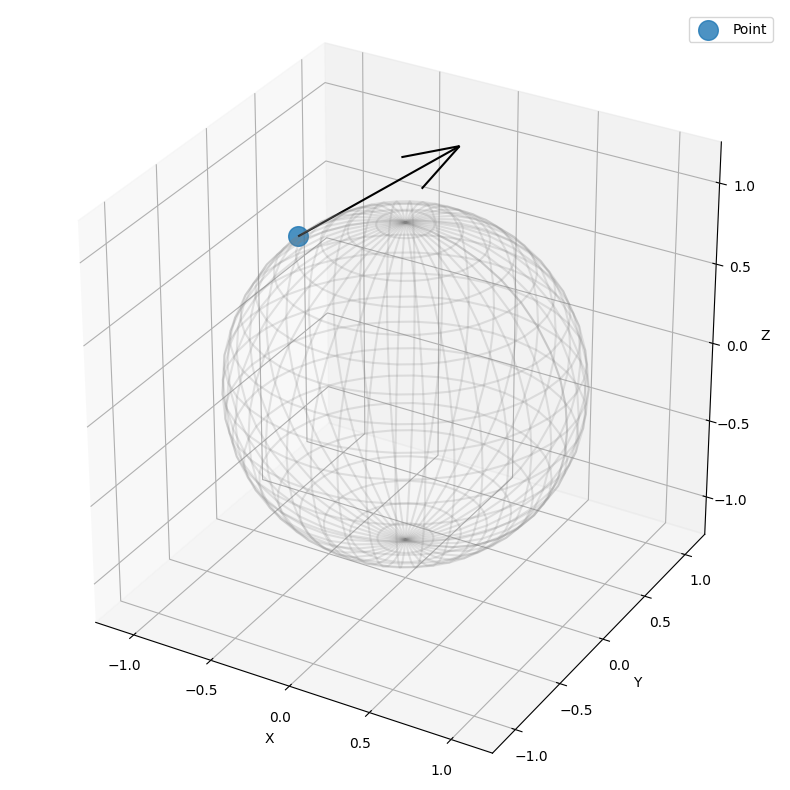

In [14]:
import numpy as np
import geomstats.visualization as viz
fig = plt.figure(figsize=(10, 10)); ax = fig.add_subplot(111, projection="3d")

point = np.array([-0.65726771, -0.02678122, 0.7531812]); point = point / np.linalg.norm(point)
vector = np.array([1, 0, 0.8])
ax = viz.plot(points=point, ax=ax, space="S2", s=200, alpha=0.8, label="Point")
arrow = viz.Arrow3D(point, vector=vector); arrow.draw(ax, color="black"); ax.legend();

# Tangent Space

$\color{#EF5645}{\text{Definition}}$: The tangent space at a certain point $p$ on a manifold $M$ is written $T_p M$ and is comprised of all of the possible tangent vectors that exist at that point.
- The tangent space is a vector space with the same dimension as the manifold.

<center><img src="figs/01_tangent_space_single.jpeg" width=500px alt="default"/></center>

Thus, the tangent space of a 1-dimensional manifold (curve) is also one dimensional, and the tangent space of a 2-dimensional manifold (a 2-dimensional surface) is also 2-dimensional.


Similarly, for every n-dimensional manifold, there exists an n-dimensional tangent space at each point on the manifold, and the tangent space is comprised of all possible tangent vectors on that manifold.

### Tangent Space to the Hypersphere

Recall that the hypersphere is defined by $S=f^{-1}(\{0\})$ where $f(x) = \|x\|^{2}-a^2$. 

The tangent space to the hypersphere is defined, at any point $x$ on $S$ by:
$$
T_{x} S=\left\{v \in \mathbb{R}^{d+1} \mid\langle x, v\rangle=0\right\} .
$$

$\color{#EF5645}{\text{Remark}}$: The tangent space depends on the point $x$ chosen on the manifold.

<center><img src="figs/01_tangent_space_single.jpeg" width=400px alt="default"/></center>

# A) Manifolds: Outline

You will learn:

1. What is a manifold? 
2. What are tangent spaces to a manifold?
3. **Why do we care about manifolds?**
4. How can we implement manifolds?

# 3. Why do we care about manifolds?

$\textbf{Data in nature "naturally falls on manifolds"}$: data are often subject to constraints, and these constraints force the data to lie on manifolds. 

<center><img src="figs/01_manifold_cities_on_earth.png" width=200px alt="default"/></center>

$\color{#047C91}{\text{Example}}$: The cities on earth are subject to the following constraints:
- they cannot fly above the surface of the earth because gravity holds them down,
- they cannot sink down into the earth because the surface of the earth holds them up. 

$\rightarrow$ they are constrained to move (or not move) on the surface of a sphere.

$\textbf{Shapes "naturally falls on manifolds"}$: shapes are subject to constraints, and these constraints force them to lie on manifolds. 

$\color{#047C91}{\text{Example}}$: Consider the shape of a triangle:
- the shape of a triangle does not change if we translate or rotate the triangle,
- the shape of a triangle does not change if we rescale it.

<center><img src="figs/01_intro_sphere_triangles.png" width=450px alt="default"/></center>


We will see that these constraints force triangles to belong to a sphere.

# Motivation for analyzing data on manifolds?

Analyzing data that lie on manifolds is often possible without taking into account the manifold, but choosing to do so can be advantageous:

a. it reduces the degrees of freedom of the system, which makes computations less complicated and more intuitive and interpretable.

b. it can give better understanding of the data's evolution.

c. it can give better predictive power and will help you extract the "signal" from a noisy data set or a data set with very few datapoints.

### a. Reduce the number of degrees of freedom

The number of degrees of freedom of a system is the minimum number of variables needed to describe the system completely.

$\color{#047C91}{\text{Example}}$:

An object moving freely in 3D requires 3 variables $(x, y, z)$ or $(R, \theta, \phi)$ to be described.


If you know that the point lies on the sphere, you only need 2 variables $(\theta, \phi)$: 

$\rightarrow$ more efficient.

<center><img src="figs/01_adv1.png" width=900px alt="default"/></center>

Knowing that the point lies on the surface of a manifold allows us to use fewer variables to record its location, which is:
- computationally more efficient in terms of memory requirements, and 
- less mentally taxing (if you are solving a problem on paper).

### b. Get a Better Understanding

Unaccelerated points travelling along a manifold follow trajectories called "geodesics".

$\color{#047C91}{\text{Example}}$: Geodesics in vector spaces are straight lines (purple $\gamma$), but geodesics on the sphere are different (pink $\gamma$).

If you did not know that the object was moving on the sphere, you would wonder why it is taking such an "irratic" path instead of just going straight. 

If you know the manifold, you realize that the particles are following very reasonable and predictable paths along geodesics.

<center><img src="figs/01_adv2bis.png" width=250px alt="default"/></center>

### c. Get Better Predictive Power

Knowing the exact manifold your data lies on can help you analyze your current data points and predict future data.

$\color{#047C91}{\text{Example}}$: Take data on a 2-dimensional sphere.
- If you did not know that your data live on the surface of a sphere, then you might try to fit your data with a line -- see Fig. (b).
- However, you should fit a geodesic curve on a sphere -- see Fig. (a).

<center><img src="figs/01_adv3d.png" width=700px alt="default"/></center>

# A) Manifolds: Outline

You will learn:

1. What is a manifold? 
2. What are tangent spaces to a manifold?
3. Why do we care about manifolds?
4. **How can we implement manifolds?**

# 4. How can we implement manifolds?

$\color{#EF5645}{\text{Geomstats}}$: a Python package for Geometry in Machine Learning and Deep Learning

Geomstats uses [object-oriented programming](https://www.educative.io/blog/object-oriented-programming) to define manifolds as "classes" that are organized into a hierarchy.

$\rightarrow$ Object-oriented programming.

## Review: Object-Oriented Programming

What is a Python class, a Python object? What is inheritance?

In [6]:
# template
class Animal:
    def __init__(self, name):
        self.name = name
class SmallAnimal(Animal):
    def __init__(self, name):
        super().__init__(name)

In [2]:
# objects from that template
dog = Animal(name="steve")
dog.name

In [8]:
small_dog = SmallAnimal(name="stevy")
small_dog.name

'stevy'

$\color{#047C91}{\text{Examples}}$: 
- `LevelSet`: implementation of manifold corresponding to our definition.
  - $\rightarrow$ special case (subclass) of `Manifold`.
- `Hypersphere` can be conveniently represented by our definition. 
  - $\rightarrow$ special case (subclass) of `LevelSet`.

<center><img src="figs/01_manifold_hierarchy.jpeg" width=900px alt="default"/></center>


Rules that are true for all manifolds are implemented in the parent class `Manifold`.

- $\color{#047C91}{\text{Example}}$: Every manifold has a dimension and a tangent space at each point.

Rules that are true for some manifolds are implemented in the subclasses of `Manifold`.

- $\color{#047C91}{\text{Example}}$: A vector space is a special type of manifold.

<center><img src="figs/01_vectorspace.png" width=300px alt="default"/></center>

### Example: Hypersphere

A sphere is an hypersphere of dimension 2, which is a special case of manifold. 

Thus, the sphere should have a `dim` attribute and `belongs` methods.

In [10]:
import numpy as np
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2); 
print(f"The sphere has dimension {sphere.dim}")
point = np.array([1, 6, 0]); 
print(f"Point is on the sphere: {sphere.belongs(point)}")

The sphere has dimension 2
Point is on the sphere: False


# Take-Home Messages

- Real-world data spaces are often manifolds.
- Manifolds can be conveniently implemented with "classes" in object-oriented programming.
- For HW1:
  - [Describe 1 manifold from Geomstats](https://github.com/bioshape-lab/ece594n/blob/main/hw-geomviz/README.md).
- For the rest of this class:
  - Focus on manifolds of shape and shape tranformations.

<center><img src="figs/01_manifold_hierarchy.jpeg" width=400px alt="default"/></center>